## *이미지 혼합 및 붙여 넣기*

혼합 및 붙여넣기는 일반적으로 두 이미지를 혼합하거나 다른 이미지 위에 이미지를 오버레이하는 데 사용됩니다. 그래픽 디자인, 로고 배치, 인터넷 밈 생성과 같은 혼합 및 붙여넣기를 위한 많은 응용 프로그램이 있습니다. 이러한 모든 응용 프로그램은 OpenCV를 사용하여 쉽고 빠르게 처리할 수 있습니다.

**이미지 붙여넣기**는 하나의 이미지를 다른 이미지 위에 오버레이하는 과정입니다.
OpenCV에서 이 프로세스를 성공적으로 적용하려면 첫 번째 이미지에서 관심 영역(ROI)을 선택한
다음 마스킹 및 몇 가지 논리 연산을 적용하여 첫 번째 이미지 위에 두 번째 이미지를 오버레이해야 합니다.

**블렌딩하는 과정**은 cv2.addWeighted() openCV의 함수를 통해 이루어집니다. 이 기능은 입력 이미지를 모두 사용하고 각 이미지 픽셀에 특정 가중치를 할당하고 함께 더한 다음 결과를 새 픽셀로 출력합니다.

## *opencv로 같은 크기의 이미지 블렌딩 실습*

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

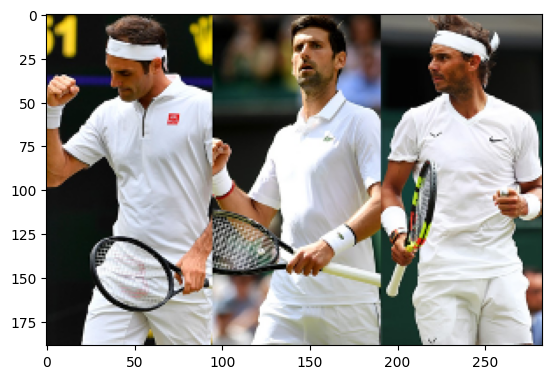

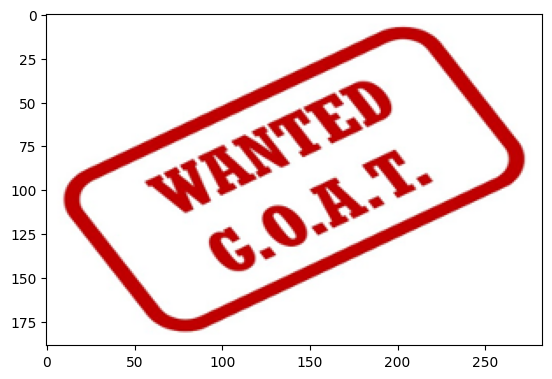

In [4]:
sample_img = cv2.imread("../data/ex_image.png")
sample_logo = cv2.imread("../data/ex_image_logo.png")

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.show()

plt.imshow(sample_logo)
plt.show()

(600, 800, 3) (600, 800, 3)


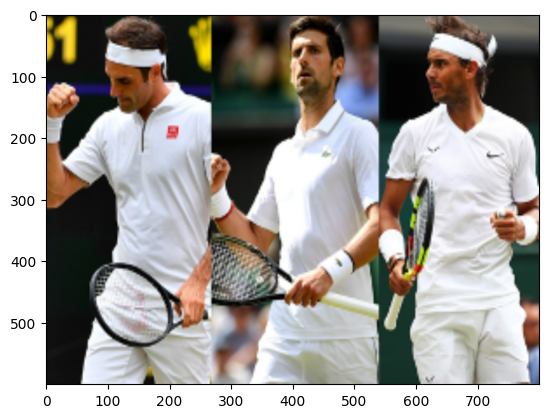

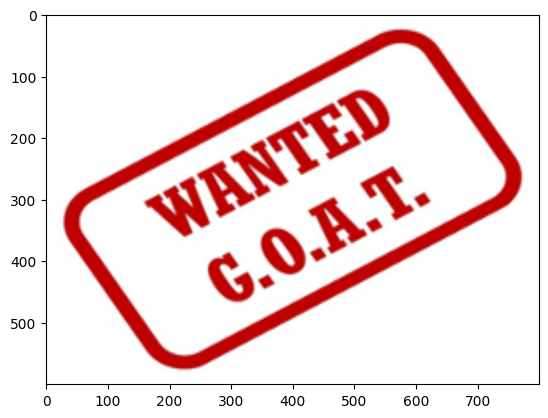

In [5]:
#이미지 크기 수정
img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

#이미지 크기 수정 여부 확인 체크
print(img1.shape, img2.shape)

#수정된 이미지 체크
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

## *이미지 혼합 실습*

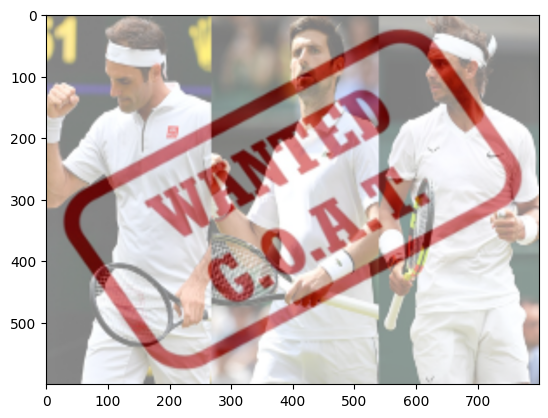

In [9]:
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

plt.imshow(blended)
plt.show()

## *블렌딩 없이 오버레이 붙여넣기*

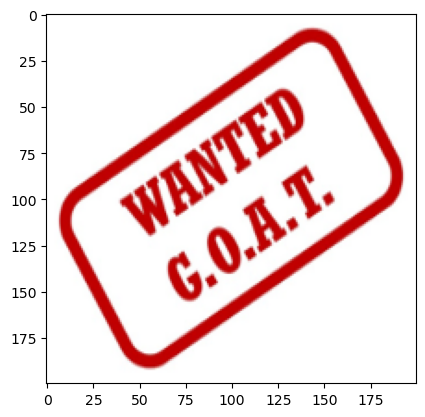

In [3]:
sample_img = cv2.imread("../data/ex_image.png")
sample_logo = cv2.imread("../data/ex_image_logo.png")

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

#이미지 크기 수정
img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

small_img = cv2.resize(img2, (200,200))
plt.imshow(small_img)
plt.show()

240 370


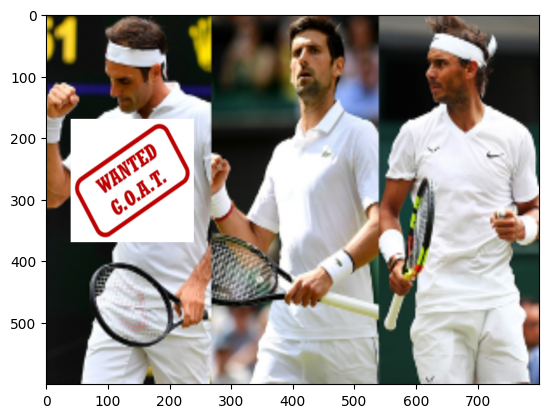

In [71]:
x_offset = 40
y_offset = 170

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

print(x_end, y_end)
img1[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(img1)
plt.show()

## *최종 실습을 위한 이미지 로드*

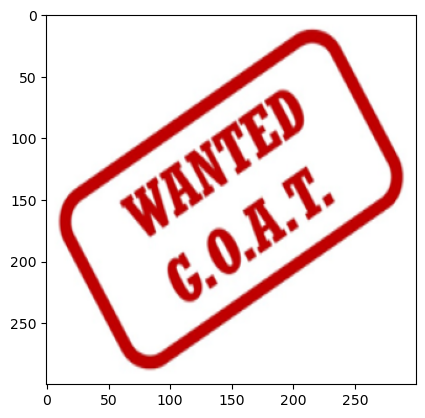

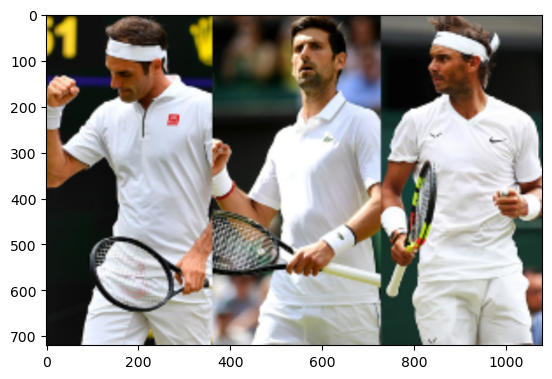

In [4]:
sample_img = cv2.imread("../data/ex_image.png")
sample_logo = cv2.imread("../data/ex_image_logo.png")

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

#워터마크 이미지 리사이즈
small_img = cv2.resize(watermark, (300,300))

#선수 이미지 사진 리사이즈
resize_img = cv2.resize(sample_img, (1080,720))


plt.imshow(small_img)
plt.show()
plt.imshow(resize_img)
plt.show()

이미지 크기 >>  300 300


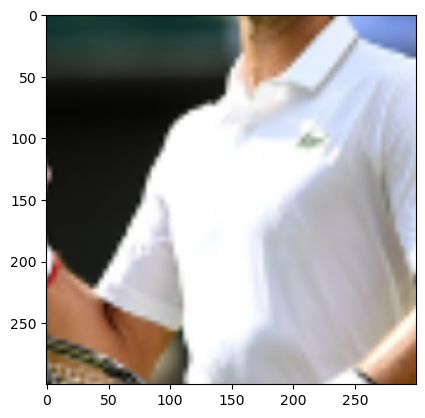

In [5]:
#이미지 정보 가져오기
height, width, _ = small_img.shape
print("이미지 크기 >> ", height, width)

x_offset = 400
y_offset = 170

roi = resize_img[y_offset:height+y_offset, x_offset:width+x_offset]

plt.imshow(roi)
plt.show()

## logo 이미지 회색조 버전 만들기

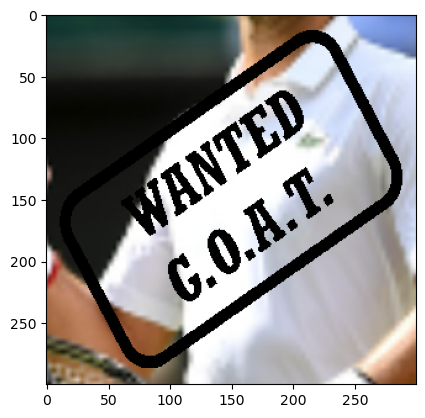

In [6]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)


bg = cv2.bitwise_or(roi, roi, mask = mask)

plt.imshow(bg)
plt.show()

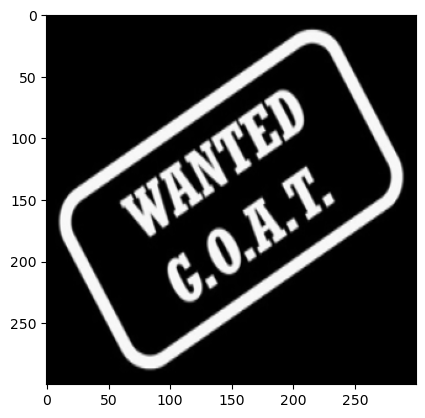

In [7]:
mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

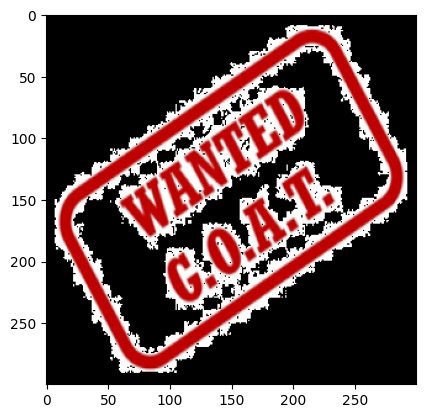

In [95]:
fg = cv2.bitwise_and(small_img, small_img, mask=mask_inv)

plt.imshow(fg)
plt.show()

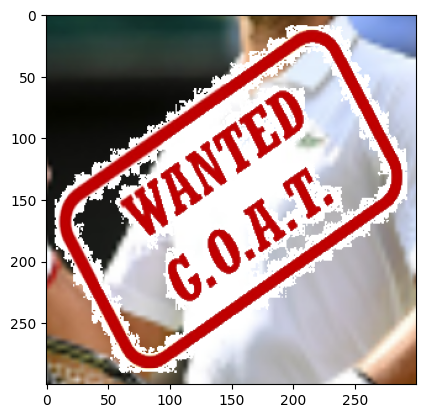

In [96]:
final_roi = cv2.add(bg, fg)

plt.imshow(final_roi)
plt.show()

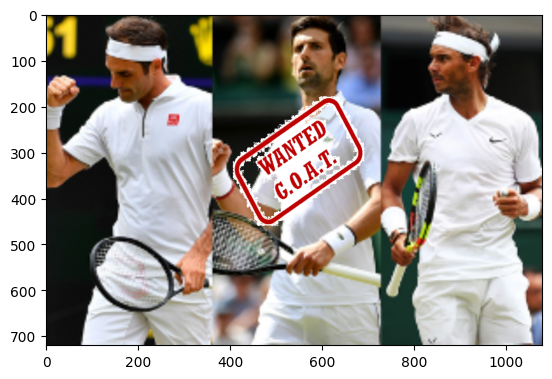

In [97]:
small_img = final_roi
resize_img[y_offset:y_offset + small_img.shape[0], x_offset : x_offset + small_img.shape[1]] = small_img

plt.imshow(resize_img)
plt.show()

## *비트연산*

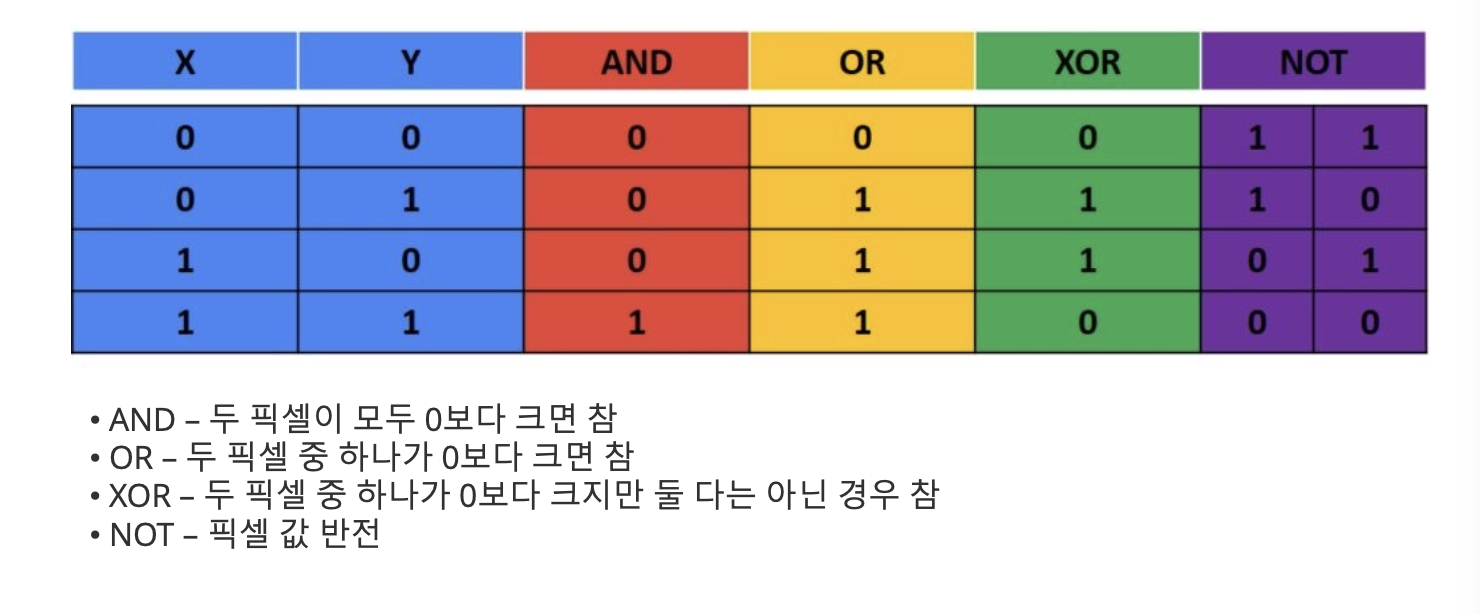

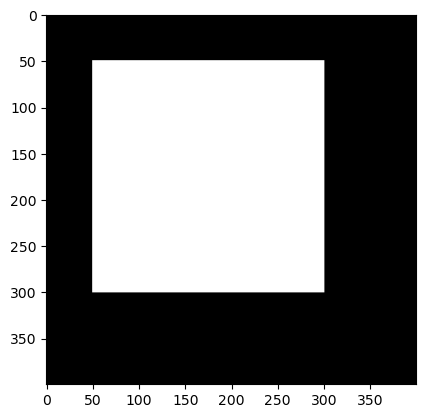

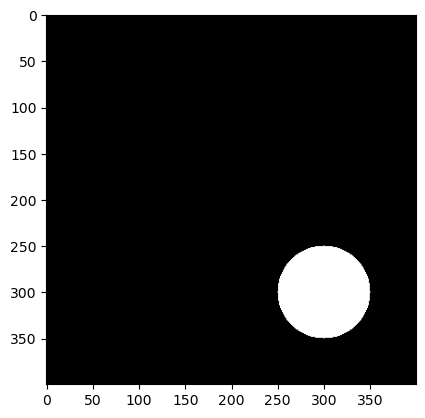

In [8]:
#사각형 임시 데이터 생성
img_rectangle = np.ones((400,400), dtype='uint8')
cv2.rectangle(img_rectangle, (50,50), (300,300), (255,255,255), -1)
    
#원 임시 데이터 생성
img_circle = np.ones((400,400), dtype='uint8')
cv2.circle(img_circle, (300,300), 50, (255,255,255), -1)

plt.imshow(img_rectangle, 'gray')
plt.show()
plt.imshow(img_circle, 'gray')
plt.show()

### A data, B data 가지고 and, or, xor, not(A:직사각형 B:원형)

### AND

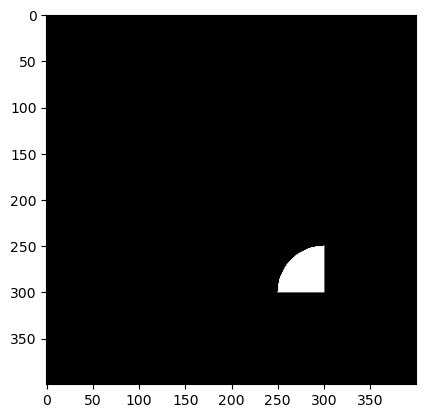

In [16]:
#and
bitwiseAnd = cv2.bitwise_and(img_rectangle, img_circle)
plt.imshow(bitwiseAnd, 'gray')
plt.show()

### OR

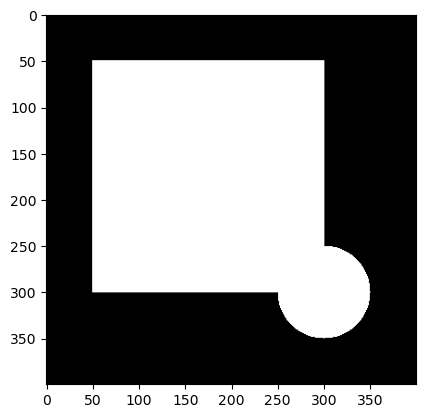

In [17]:
#or
bitwiseOr = cv2.bitwise_or(img_rectangle, img_circle)
plt.imshow(bitwiseOr, 'gray')
plt.show()

### XOR

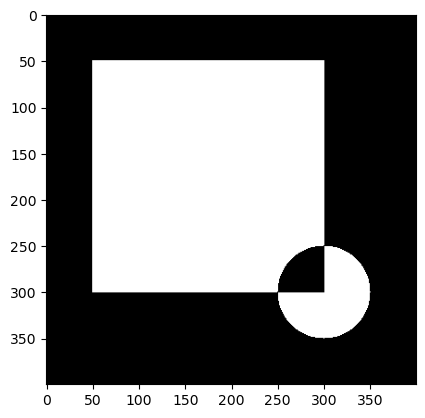

In [18]:
#xor
bitwiseXor = cv2.bitwise_xor(img_rectangle, img_circle)
plt.imshow(bitwiseXor, 'gray')
plt.show()

### NOT

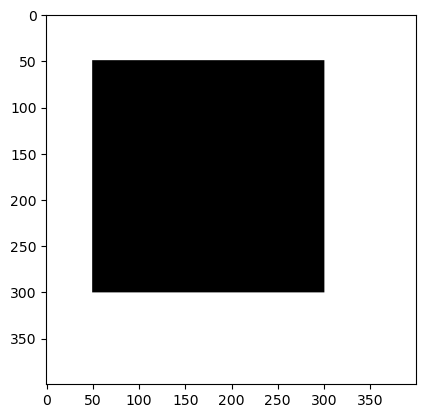

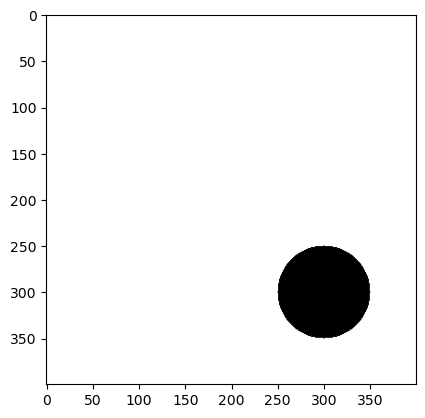

In [19]:
#not
bitwiseNot1 = cv2.bitwise_not(img_rectangle)
plt.imshow(bitwiseNot1, 'gray')
plt.show()

bitwiseNot2 = cv2.bitwise_not(img_circle)
plt.imshow(bitwiseNot2, 'gray')
plt.show()

## *마스킹 실습*

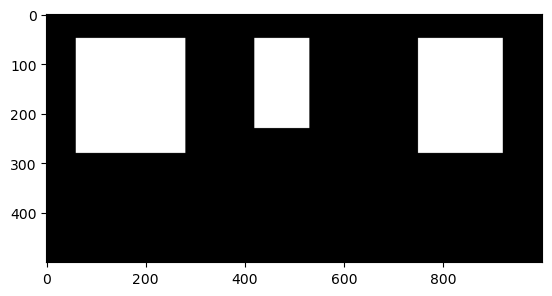

In [13]:
img_rectangle_temp = np.ones((500, 1000),  dtype='uint8')

mask = np.zeros(img_rectangle_temp.shape, dtype='uint8')

#직사각형 안에 흰색 직사각형 추가
cv2.rectangle(mask, (60,50), (280,280), (255,255,255), -1)
cv2.rectangle(mask, (420,50), (530,230), (255,255,255), -1)
cv2.rectangle(mask, (750,50), (920,280), (255,255,255), -1)

plt.imshow(mask, 'gray')
plt.show()